# Importación de librerías

In [21]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import os
import re # Expresiones regulares
from sklearn import preprocessing # LabelEncoder

In [22]:
data = pd.read_table("../Dataset/labeledEligibilitySample10k.csv", header = None)

In [23]:
print(data.shape)

(10000, 1)


### Se transforma la variable elegible (la salida) en 0 y 1

In [24]:
clin_trial = pd.DataFrame(np.array(data).reshape(10000,1), columns=['Description'])
clin_trial[:].head(10)

,Description
0,"18518,__label__0,study interventions are Erlot..."
1,"71331,__label__0,study interventions are Antib..."
2,"232342,__label__0,study interventions are Cycl..."
3,"450677,__label__0,study interventions are Pred..."
4,"410008,__label__0,study interventions are Inte..."
5,"307723,__label__0,study interventions are Erlo..."
6,"378773,__label__0,study interventions are Phar..."
7,"479580,__label__0,study interventions are Myco..."
8,"458795,__label__0,study interventions are gamm..."
9,"366518,__label__0,study interventions are Succ..."


In [25]:
clin_trial['Num'], clin_trial['ExtraPart'] = clin_trial['Description'].str.split(',', 1).str
clin_trial=clin_trial.drop(['Num'], axis=1)

clin_trial['Label'], clin_trial['TrashPart'] = clin_trial['ExtraPart'].str.split(',', 1).str
clin_trial['Eligible'] = clin_trial['Label'].str.extract('(\d)', expand=True)
clin_trial=clin_trial.drop(['Label'], axis=1)
clin_trial=clin_trial.drop(['ExtraPart'], axis=1)

clin_trial['Interventions'], clin_trial['Diagnoses'] = clin_trial['TrashPart'].str.split('.', 1).str
clin_trial=clin_trial.drop(['TrashPart'], axis=1)

clin_trial=clin_trial.drop(['Description'], axis=1)

clin_trial.head(10)

,Eligible,Interventions,Diagnoses
0,0,study interventions are Erlotinib Hydrochloride,recurrent midline lethal granuloma of the par...
1,0,study interventions are Antibodies,fallopian tube cancer diagnosis and periphera...
2,0,study interventions are Cyclosporine,recurrent adult diffuse mixed cell lymphoma d...
3,0,study interventions are Prednisolone phosphate,childhood immunoblastic large cell lymphoma d...
4,0,study interventions are Interferon-alpha,stage multiple myeloma diagnosis and serum pr...
5,0,study interventions are Erlotinib Hydrochloride,patients must have carcinoma of unknown prima...
6,0,study interventions are Pharmacological Study,hepatoblastoma diagnosis and two weeks must h...
7,0,study interventions are Mycophenolic Acid,recurrent grade one follicular lymphoma diagn...
8,0,study interventions are gamma-secretase/Notch ...,recurrent non small cell lung cancer diagnosi...
9,0,study interventions are Succinylcholine,untreated childhood medulloblastoma diagnosis...


In [26]:
# Se quita study interventions are puesto que está en todas las muestras de la varialbe Interventions
clin_trial['Interventions'] = clin_trial['Interventions'].str.replace("study interventions are\s", "")
clin_trial.sample(10)

,Eligible,Interventions,Diagnoses
8359,1,Cisplatin,gastric cancer diagnosis and other concurrent...
2448,0,MLN4924,tumor tissue that in the opinion of the inves...
7973,1,Dabrafenib,stage iiib skin melanoma diagnosis and herbal...
9821,1,Cetuximab,head and neck cancer diagnosis and patients w...
3772,0,Fludarabine phosphate,recurrent grade two follicular lymphoma diagn...
4675,0,Albumin-Bound Paclitaxel,breast cancer diagnosis and must have failed ...
4342,0,Liposomal doxorubicin,recurrent childhood soft tissue sarcoma diagn...
1430,0,Formoterol Fumarate,lung cancer diagnosis and not planning to don...
4493,0,Carboplatin,non small cell lung cancer diagnosis and crea...
3595,0,Cisplatin,stage ivb squamous cell carcinoma of the orop...


In [27]:
#Sirve para buscar palabras con esos caracteres

# for name in list(clin_trial.columns):
#     for sample in clin_trial[name]:
#         if re.findall('[+=*^#áÁéÉíÍóÓúÚ\[\]\$,.;:!@¡¿?\{\}\&`~\^\(\)|%_\-<>\'\"]', sample):
#             print(sample, "\n") ## Funciona para detectar caracteres especiales

In [28]:
# Se transforma todo a minúsculas
clin_trial['Interventions'] = clin_trial['Interventions'].str.lower() ##Todo a minúscula
clin_trial['Diagnoses'] = clin_trial['Diagnoses'].str.lower()     ##Todo a minúscula

#Se reemplazan vocales con tildes en ambas variables
clin_trial['Interventions'] = clin_trial['Interventions'].str.replace('[áäâà]', 'a', regex=True)
clin_trial['Interventions'] = clin_trial['Interventions'].str.replace('[éêèë]', 'e', regex=True)
clin_trial['Interventions'] = clin_trial['Interventions'].str.replace('[íïìî]', 'i', regex=True)
clin_trial['Interventions'] = clin_trial['Interventions'].str.replace('[óôòö]', 'o', regex=True)
clin_trial['Interventions'] = clin_trial['Interventions'].str.replace('[úûùü]', 'u', regex=True)
clin_trial['Interventions'] = clin_trial['Interventions'].str.replace('["]', '', regex=True)

clin_trial['Diagnoses'] = clin_trial['Diagnoses'].str.replace('[áäâà]', 'a', regex=True)
clin_trial['Diagnoses'] = clin_trial['Diagnoses'].str.replace('[éêèë]', 'e', regex=True)
clin_trial['Diagnoses'] = clin_trial['Diagnoses'].str.replace('[íïìî]', 'i', regex=True)
clin_trial['Diagnoses'] = clin_trial['Diagnoses'].str.replace('[óôòö]', 'o', regex=True)
clin_trial['Diagnoses'] = clin_trial['Diagnoses'].str.replace('[úûùü]', 'u', regex=True)
clin_trial['Diagnoses'] = clin_trial['Diagnoses'].str.replace('^\s', '', regex=True)
clin_trial['Diagnoses'] = clin_trial['Diagnoses'].str.replace('["]', '', regex=True)
clin_trial['Diagnoses'] = clin_trial['Diagnoses'].str.replace('[;]', '', regex=True)



#clin_trial.sample(10)

In [29]:
# Total de categorías diferentes en la variable Interventions
len(np.unique(clin_trial['Interventions'])) 

1426

In [30]:
# Sirve para ver cuantos datos hay por categoría de interventions

datosInt = clin_trial['Interventions'].value_counts()

In [31]:
# Total de categorías diferentes en la variable Diagnoses
len(np.unique(clin_trial['Diagnoses']))

9786

In [32]:
datosDiag = clin_trial['Diagnoses'].value_counts() 
#datosDiag

## Codificación de la variable Interventions

In [33]:
labels = np.unique(clin_trial['Interventions'])

lb_interventions = preprocessing.LabelEncoder()
lb_interventions.fit(labels)
clin_trial['Interventions'] = lb_interventions.transform(clin_trial['Interventions']) 

In [34]:
clin_trial

,Eligible,Interventions,Diagnoses
0,0,464,recurrent midline lethal granuloma of the para...
1,0,101,fallopian tube cancer diagnosis and peripheral...
2,0,349,recurrent adult diffuse mixed cell lymphoma di...
3,0,1052,childhood immunoblastic large cell lymphoma di...
4,0,708,stage multiple myeloma diagnosis and serum pro...
...,...,...,...
9995,1,1109,prostate neoplasms diagnosis and if brain imag...
9996,1,200,multiple myeloma diagnosis and any condition i...
9997,1,1201,lung carcinoid tumor diagnosis and patients wh...
9998,1,939,stage iv colorectal cancer diagnosis and serio...


# Remover Stop Words

## Preliminares

In [36]:
# Se carga la libreria
from nltk.corpus import stopwords

# Se debe descargar el conjunto de 'Stop Words' la primera vez
import nltk
nltk.download('stopwords')

#Se carga la librería de lematización
#PONER conda install -c conda-forge spacy EN ANACONDA PROMPT
# Y python -m spacy download en_core_web_sm

#Se carga la librería de lematización
import spacy
nlp = spacy.load("en_core_web_sm")

#Se carga la librería de stemming y se inicializa el stemmer
import nltk
from nltk import SnowballStemmer
stemmer=SnowballStemmer('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\danie\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Crear las palabras Token

## Lematización

"Dada una forma flexionada (es decir, en plural, en femenino, conjugada, etc), hallar el lema correspondiente. El lema es la forma que por convenio se acepta como representante de todas las formas flexionadas de una misma palabra. Es decir, el lema de una palabra es la palabra que nos encontraríamos como entrada en un diccionario tradicional: singular para sustantivos, masculino singular para adjetivos, infinitivo para verbos." -Wikipedia

In [37]:
#https://medium.com/qu4nt/reducir-el-número-de-palabras-de-un-texto-lematización-y-radicalización-stemming-con-python-965bfd0c69fa
toks = []

for sample in clin_trial['Diagnoses']:
    words = nlp(sample)
    lemma = [tok.lemma_.lower() for tok in words]
    #print(lemma)
    toks.append(lemma)
    

## Cargar las Stop Words

In [38]:
# Carga las Stop Words en inglés
stop_words = stopwords.words('english')

## Estaría bien revisar este conjunto 'english'. Pero supongo que es el más útil para nuestro caso también.
# Imprime algunas Stop Words
#stop_words[:100]

## Remover las Stop Words

In [39]:
tokens = []
for tok in toks:
    clean_word = [word for word in tok if word not in stop_words]
    tokens.append(clean_word)

## Stemming

"Es un método para reducir una palabra a su raíz o (en inglés) a un stem." - Wikipedia

In [40]:
stemms = []
for tok in tokens:
    var = [stemmer.stem(token) for token in tok]
    stemms.append(var)

# TF-IDF 
Term frequency – Inverse document frequency

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [42]:
stemmsT = [ ' '.join(stemms[item]) for item in range (len(stemms))] #Se transforma de lista de listas a una lista

In [43]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(stemmsT)

In [44]:
cols = vectorizer.get_feature_names()
dense = X.todense()
denselist = dense.tolist()

In [45]:
df = pd.DataFrame(data=denselist, columns= cols)

In [46]:
df

,14v,1five,1four,1six,1three,1two,1two0,1two00,1two5,1zero,...,³one0,³one00,µl,ºc,½_teaspoon,μl,μmol,ⅰa,ⅱa,ⅲa
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Ordenar y eliminar palabras

In [26]:
import operator

bowDict = {}

for column in df:
    bowDict[column] = df[column].sum()

bowDict_sort = sorted(bowDict.items(), key=operator.itemgetter(1), reverse=True)

# print(bowDict_sort)

In [27]:
bowDict_sort2 = bowDict_sort
for word in bowDict_sort2:
    if word[1]>3400: #Para eliminar con un umbral
        bowDict_sort2.remove(word) 

# Concatenación de dfs

In [47]:
del clin_trial['Diagnoses']
clin_trial_full = pd.concat([clin_trial, df], axis=1)
clin_trial_full

,Eligible,Interventions,14v,1five,1four,1six,1three,1two,1two0,1two00,...,³one0,³one00,µl,ºc,½_teaspoon,μl,μmol,ⅰa,ⅱa,ⅲa
0,0,464,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,349,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,1052,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,708,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,1109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9996,1,200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9997,1,1201,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9998,1,939,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Guardado del modelo

In [29]:
clin_trial_full.to_hdf('bagOfWords10k_TFIDF.h5', key = 'clin_trial')

In [2]:
df_loaded = pd.read_hdf('bagOfWords10k_TFIDF-BoW.h5', 'clin_trial')

In [3]:
df_loaded

,Eligible,Interventions,abdomin,abil,abl,abnorm,abscess,absenc,absolut,absorpt,...,within,without,woman,would,wound,write,year,york,zero,zone
0,0,464,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
1,0,101,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.204349,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
2,0,349,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
3,0,1052,0.0,0.0,0.0,0.119754,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.099676,0.0
4,0,708,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,1109,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
9996,1,200,0.0,0.0,0.0,0.256094,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
9997,1,1201,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.210823,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
9998,1,939,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.366276,0.0,0.0,0.0,0.000000,0.0


In [48]:
eligible = clin_trial_full['Eligible'].values #Para ver las palabras por clase

dict_0 = {}
dict_1 = {}

for col in clin_trial_full:
    if(col == 'Eligible' or col == 'Interventions'):
        continue
    ar = clin_trial_full[col].values
    condlist = [(eligible == "1") & (ar != 0.0), (eligible == "0") & (ar != 0.0)]
    choicelist = [1, 2]
    res = np.select(condlist, choicelist)
    
    dict_0[col] = len(res[res==2])
    dict_1[col] = len(res[res==1])

In [53]:
for a,b in zip (dict_0, dict_1): #Para imprimir las palabras
    if((dict_0[a] +dict_1[b]) <= 20  and (dict_0[a] +dict_1[b]) >= 6):
        print(a + " tiene ", dict_0[a], " muestras en la clase 0 \n" + b + " tiene ", dict_1[b], " muestras en la clase 1")

1five tiene  7  muestras en la clase 0 
1five tiene  0  muestras en la clase 1
1four tiene  1  muestras en la clase 0 
1four tiene  5  muestras en la clase 1
1two tiene  3  muestras en la clase 0 
1two tiene  4  muestras en la clase 1
abdoman tiene  4  muestras en la clase 0 
abdoman tiene  2  muestras en la clase 1
ablat tiene  7  muestras en la clase 0 
ablat tiene  1  muestras en la clase 1
abortifaci tiene  0  muestras en la clase 0 
abortifaci tiene  11  muestras en la clase 1
abstain tiene  6  muestras en la clase 0 
abstain tiene  0  muestras en la clase 1
abus tiene  1  muestras en la clase 0 
abus tiene  10  muestras en la clase 1
accid tiene  7  muestras en la clase 0 
accid tiene  12  muestras en la clase 1
accur tiene  14  muestras en la clase 0 
accur tiene  0  muestras en la clase 1
acet tiene  2  muestras en la clase 0 
acet tiene  4  muestras en la clase 1
acinar tiene  5  muestras en la clase 0 
acinar tiene  3  muestras en la clase 1
acquir tiene  6  muestras en la cl

cardiologist tiene  3  muestras en la clase 1
cardiomyopathi tiene  0  muestras en la clase 0 
cardiomyopathi tiene  6  muestras en la clase 1
caregiv tiene  2  muestras en la clase 0 
caregiv tiene  4  muestras en la clase 1
carri tiene  1  muestras en la clase 0 
carri tiene  8  muestras en la clase 1
cathet tiene  2  muestras en la clase 0 
cathet tiene  8  muestras en la clase 1
cd tiene  5  muestras en la clase 0 
cd tiene  5  muestras en la clase 1
cdfour tiene  6  muestras en la clase 0 
cdfour tiene  5  muestras en la clase 1
cdtwenti tiene  7  muestras en la clase 0 
cdtwenti tiene  2  muestras en la clase 1
cellular tiene  12  muestras en la clase 0 
cellular tiene  0  muestras en la clase 1
center tiene  8  muestras en la clase 0 
center tiene  7  muestras en la clase 1
certain tiene  2  muestras en la clase 0 
certain tiene  6  muestras en la clase 1
cetuximab tiene  4  muestras en la clase 0 
cetuximab tiene  9  muestras en la clase 1
cgi tiene  4  muestras en la clase 0 


dialysi tiene  5  muestras en la clase 1
diaphragm tiene  5  muestras en la clase 0 
diaphragm tiene  6  muestras en la clase 1
diarrhea tiene  3  muestras en la clase 0 
diarrhea tiene  13  muestras en la clase 1
differ tiene  2  muestras en la clase 0 
differ tiene  5  muestras en la clase 1
digest tiene  8  muestras en la clase 0 
digest tiene  8  muestras en la clase 1
digoxin tiene  2  muestras en la clase 0 
digoxin tiene  4  muestras en la clase 1
diltiazem tiene  2  muestras en la clase 0 
diltiazem tiene  4  muestras en la clase 1
dimens tiene  19  muestras en la clase 0 
dimens tiene  1  muestras en la clase 1
dipstick tiene  10  muestras en la clase 0 
dipstick tiene  7  muestras en la clase 1
discuss tiene  4  muestras en la clase 0 
discuss tiene  5  muestras en la clase 1
dissect tiene  3  muestras en la clase 0 
dissect tiene  8  muestras en la clase 1
distant tiene  5  muestras en la clase 0 
distant tiene  6  muestras en la clase 1
dna tiene  6  muestras en la clase 0 

food tiene  7  muestras en la clase 1
forc tiene  5  muestras en la clase 0 
forc tiene  12  muestras en la clase 1
formul tiene  2  muestras en la clase 0 
formul tiene  10  muestras en la clase 1
formula tiene  14  muestras en la clase 0 
formula tiene  6  muestras en la clase 1
frontlin tiene  5  muestras en la clase 0 
frontlin tiene  1  muestras en la clase 1
fu tiene  2  muestras en la clase 0 
fu tiene  4  muestras en la clase 1


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



  muestras en la clase 0 
nodular tiene  3  muestras en la clase 1
noncleav tiene  10  muestras en la clase 0 
noncleav tiene  3  muestras en la clase 1
noncompli tiene  0  muestras en la clase 0 
noncompli tiene  6  muestras en la clase 1
noncutan tiene  2  muestras en la clase 0 
noncutan tiene  4  muestras en la clase 1
nonmalign tiene  5  muestras en la clase 0 
nonmalign tiene  3  muestras en la clase 1
nonmelanoma tiene  1  muestras en la clase 0 
nonmelanoma tiene  9  muestras en la clase 1
nonsmal tiene  3  muestras en la clase 0 
nonsmal tiene  5  muestras en la clase 1
nsaid tiene  5  muestras en la clase 0 
nsaid tiene  3  muestras en la clase 1
number tiene  14  muestras en la clase 0 
number tiene  3  muestras en la clase 1
nutrit tiene  2  muestras en la clase 0 
nutrit tiene  9  muestras en la clase 1
object tiene  1  muestras en la clase 0 
object tiene  5  muestras en la clase 1
obscur tiene  1  muestras en la clase 0 
obscur tiene  5  muestras en la clase 1
observ tie

prothrombin tiene  6  muestras en la clase 1
prove tiene  17  muestras en la clase 0 
prove tiene  2  muestras en la clase 1
psa tiene  16  muestras en la clase 0 
psa tiene  4  muestras en la clase 1
psoriasi tiene  0  muestras en la clase 0 
psoriasi tiene  7  muestras en la clase 1
psychosoci tiene  8  muestras en la clase 0 
psychosoci tiene  1  muestras en la clase 1
ptt tiene  11  muestras en la clase 0 
ptt tiene  4  muestras en la clase 1
pugh tiene  4  muestras en la clase 0 
pugh tiene  6  muestras en la clase 1
qtcf tiene  1  muestras en la clase 0 
qtcf tiene  8  muestras en la clase 1
qualifi tiene  1  muestras en la clase 0 
qualifi tiene  9  muestras en la clase 1
qualiti tiene  5  muestras en la clase 0 
qualiti tiene  2  muestras en la clase 1
quantit tiene  4  muestras en la clase 0 
quantit tiene  2  muestras en la clase 1
question tiene  2  muestras en la clase 0 
question tiene  9  muestras en la clase 1
questionnair tiene  3  muestras en la clase 0 
questionnair t

sorafenib tiene  10  muestras en la clase 1
speak tiene  5  muestras en la clase 0 
speak tiene  2  muestras en la clase 1
specimen tiene  6  muestras en la clase 0 
specimen tiene  1  muestras en la clase 1
spermicid tiene  3  muestras en la clase 0 
spermicid tiene  3  muestras en la clase 1
spiral tiene  16  muestras en la clase 0 
spiral tiene  1  muestras en la clase 1
stain tiene  6  muestras en la clase 0 
stain tiene  0  muestras en la clase 1
state tiene  3  muestras en la clase 0 
state tiene  13  muestras en la clase 1
stent tiene  2  muestras en la clase 0 
stent tiene  7  muestras en la clase 1
step tiene  6  muestras en la clase 0 
step tiene  3  muestras en la clase 1
stereotact tiene  7  muestras en la clase 0 
stereotact tiene  3  muestras en la clase 1
still tiene  3  muestras en la clase 0 
still tiene  3  muestras en la clase 1
stop tiene  3  muestras en la clase 0 
stop tiene  8  muestras en la clase 1
stromal tiene  13  muestras en la clase 0 
stromal tiene  6  mu

ureter tiene  2  muestras en la clase 1
urethr tiene  9  muestras en la clase 0 
urethr tiene  7  muestras en la clase 1
urinalysi tiene  5  muestras en la clase 0 
urinalysi tiene  4  muestras en la clase 1
urinari tiene  9  muestras en la clase 0 
urinari tiene  9  muestras en la clase 1
usual tiene  8  muestras en la clase 0 
usual tiene  3  muestras en la clase 1
util tiene  3

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



# Algoritmos de clasificación

In [4]:
clin_trial_values = df_loaded.values
Y = clin_trial_values[:, 0]
Y = Y.astype(int)
X = clin_trial_values[:, 1:]

In [5]:
X = X[:, [1, 3, 5, 7, 10, 11, 12, 13, 17, 19, 23, 24, 27, 30, 31, 32, 33, 34, 35, 36, 40, 41, 45, 46, 49, 55, 56, 57, 58, 59, 61, 64, 65, 67, 68, 69, 70, 71, 75, 76, 79, 82, 83, 84, 87, 93, 95, 96, 98, 100, 101, 104, 107, 111, 118, 122, 123, 125, 126, 127, 131, 135, 136, 141, 146, 147, 149, 150, 152, 155, 156, 163, 165, 167, 168, 170, 171, 173, 174, 176, 177, 180, 182, 185, 188, 189, 191, 193, 194, 196, 197, 198, 199, 202, 204, 205, 206, 209, 210, 213, 217, 220, 221, 222, 223, 224, 231, 232, 235, 237, 238, 244, 248, 251, 255, 256, 257, 258, 260, 261, 264, 265, 266, 268, 274, 276, 277, 279, 282, 283, 285, 286, 288, 290, 294, 295, 297, 299, 301, 305, 307, 310, 316, 320, 323, 324, 325, 329, 330, 333, 335, 336, 337, 338, 340, 342, 343, 345, 346, 349, 350, 353, 354, 358, 360, 361, 363, 367, 371, 372, 374, 377, 382, 384, 385, 390, 391, 394, 395, 397, 401, 406, 410, 413, 414, 415, 420, 421, 422, 427, 428, 432, 435, 437, 443, 446, 447, 448, 449, 454, 458, 460, 463, 468, 481, 488, 489, 492, 495, 501, 504, 511, 513, 518, 520, 522, 524, 525, 526, 529, 532, 534, 537, 541, 547, 558, 561, 563, 564, 565, 566, 570, 571, 577, 578, 580, 582, 583, 584, 586, 587, 590, 592, 593, 596, 598, 603, 605, 607, 610, 612, 630, 632, 633, 647, 648, 651, 660, 664, 665, 666, 672, 680, 686, 689, 691, 703, 718, 735, 738, 739, 745, 747, 757, 761, 762, 770, 776, 783, 786, 787, 793, 799, 801, 802, 805, 806, 813, 820, 821, 822, 824, 832, 834, 843, 846, 847, 849, 857, 863]]

In [6]:
X.shape

(10000, 300)

In [7]:
def classification_error(y_est, y_real):
    err = 0
    for y_e, y_r in zip(y_est, y_real):

        if y_e != y_r:
            err += 1

    return err/np.size(y_est)

In [8]:
def plot_roc(Xtest, Ytest, probs, xlabel):
    ns_probs = [0 for _ in range(len(Ytest))]
    
    probs = probs[:, 1]
    ns_auc = roc_auc_score(Ytest, ns_probs)
    auc = roc_auc_score(Ytest, probs)  

    print('No Skill: ROC AUC=%.3f' % (ns_auc))
    print(xlabel, ': ROC AUC=%.3f' % (auc))

    ns_fpr, ns_tpr, _ = roc_curve(Ytest, ns_probs)
    fpr, tpr, _ = roc_curve(Ytest, probs)   

    plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
    plt.plot(fpr, tpr, marker='.', label= xlabel)

    # axis labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    # show the legend
    plt.legend()
    # show the plot
    plt.show()

# Naive Bayes

In [9]:
from sklearn.preprocessing import MinMaxScaler # Escala los datos
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
import scikitplot as skplt 
from string import ascii_uppercase 
# import seaborn as sns
import qgrid
import time
from sklearn.externals import joblib # Para guardar el modelo
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

C:\Users\danie\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [31]:
from sklearn.naive_bayes import GaussianNB

In [32]:
def model_NB(impresion = False):

    tiempo_i = time.time()

    accuracy_list = np.zeros([4])
    precision_list = np.zeros([4,2])
    recall_list = np.zeros([4,2])
    f_list = np.zeros([4,2]) 
    errores = np.zeros(4)
    nb = GaussianNB()
    for j in range(4):
        Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.25) # Modificar metodología de validación
        scaler = MinMaxScaler()#Escala entre 0 y 1
        Xtrain = scaler.fit_transform(Xtrain)
        Xtest = scaler.transform(Xtest)

        nb.fit(Xtrain, Ytrain)
        pred = nb.predict(Xtest)
        
        #code for calculating accuracy 
        _accuracy_ = accuracy_score(Ytest, pred, normalize=True)
        accuracy_list[j] = _accuracy_

        #code for calculating recall 
        _recalls_ = recall_score(Ytest, pred, average=None)
        recall_list[j] = _recalls_

        #code for calculating precision 
        _precisions_ = precision_score(Ytest, pred, average=None)
        precision_list[j] = _precisions_
        
        _f_score_ = f1_score(Ytest, pred, average=None)
        f_list[j] = _f_score_
                
        errores[j] = classification_error(pred, Ytest)
          
    if impresion == True:
        #Curva ROC
        nb_probs = nb.predict_proba(Xtest)
        
        plot_roc(Xtest, Ytest, nb_probs, "Naive Bayes")
#         auc = roc_auc_score(Ytest, pred)
#         print('AUC: %.2f' % auc)
#         fpr, tpr, thresholds = roc_curve(Ytest, pred)
#         plot_roc_curve(fpr, tpr)
        #Matriz de confusión
        skplt.metrics.plot_confusion_matrix(Ytest, pred, normalize=True)

    return str(np.mean(accuracy_list)), str(np.std(accuracy_list)), str(np.mean(recall_list)), str(np.std(recall_list)), str(np.mean(precision_list)), str(np.std(precision_list)),  str(np.mean(f_list)), str(np.std(f_list)), str(np.mean(errores)), str(np.std(errores)), str(time.time()-tiempo_i)

No Skill: ROC AUC=0.500
Naive Bayes : ROC AUC=0.748


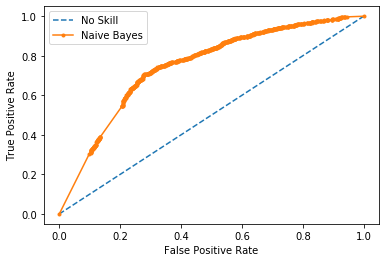

Eficiencia 0.6827  Int_Eficiencia 0.01065222981351789  Sensibilidad 0.6818448401539293  Int_Sensibilidad 0.13131188816887962  Precision 0.6953831659755063  Int_Precision 0.049293401552270244  F-Score 0.6767116088158496  Int_F-Score 0.04593235274580446  Error_Prueba 0.3173  Int_Error 0.010652229813517919  Tiempo ejecución 1.4353034496307373


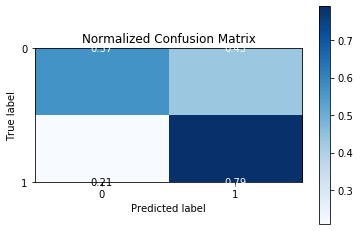

In [36]:
Acc, IntAcc, Sen, IntSen, Pre, IntPre, f, IntF, error, stdError, tiempo = model_NB(impresion = True)
print('Eficiencia',Acc, ' Int_Eficiencia', IntAcc,' Sensibilidad', Sen, ' Int_Sensibilidad',IntSen,' Precision', Pre, ' Int_Precision',IntPre,' F-Score', f, ' Int_F-Score',IntF,' Error_Prueba', error,' Int_Error', stdError,' Tiempo ejecución', tiempo)

In [ ]:
# joblib.dump(nb, 'naive_bayes.pkl') # Guardo el modelo.

# Logistic Regression

In [10]:
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LogisticRegression

In [11]:
def LRC(c, slv, impresion = False):

    tiempo_i = time.time()
    
    accuracy_list = np.zeros([4])
    precision_list = np.zeros([4,2])
    recall_list = np.zeros([4,2])
    f_list = np.zeros([4,2]) 
    errores = np.zeros(4)
    LR = LogisticRegression(C=c, solver=slv, max_iter = 200)
    for j in range(4):
        Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.25) # Modificar metodología de validación
        scaler = MinMaxScaler()#Escala entre 0 y 1
        Xtrain = scaler.fit_transform(Xtrain)
        Xtest = scaler.transform(Xtest)
        
        LR.fit(Xtrain, Ytrain)
        pred = LR.predict(Xtest)
        
        #code for calculating accuracy 
        _accuracy_ = accuracy_score(Ytest, pred, normalize=True)
        accuracy_list[j] = _accuracy_

        #code for calculating recall 
        _recalls_ = recall_score(Ytest, pred, average=None)
        recall_list[j] = _recalls_

        #code for calculating precision 
        _precisions_ = precision_score(Ytest, pred, average=None)
        precision_list[j] = _precisions_
        
        _f_score_ = f1_score(Ytest, pred, average=None)
        f_list[j] = _f_score_

                
        errores[j] = classification_error(pred, Ytest)
           
    if impresion == True:
        #Curva ROC
        
        lr_probs = LR.predict_proba(Xtest)
        
        plot_roc(Xtest, Ytest, lr_probs, "Logistic Regression")
        
#         auc = roc_auc_score(Ytest, pred)
#         print('AUC: %.2f' % auc)
#         fpr, tpr, thresholds = roc_curve(Ytest, pred)
#         plot_roc_curve(fpr, tpr)
        #Matriz de confusión
        skplt.metrics.plot_confusion_matrix(Ytest, pred, normalize=True)

    return str(np.mean(accuracy_list)), str(np.std(accuracy_list)), str(np.mean(recall_list)), str(np.std(recall_list)), str(np.mean(precision_list)), str(np.std(precision_list)),  str(np.mean(f_list)), str(np.std(f_list)), str(np.mean(errores)), str(np.std(errores)), str(time.time()-tiempo_i)

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.872


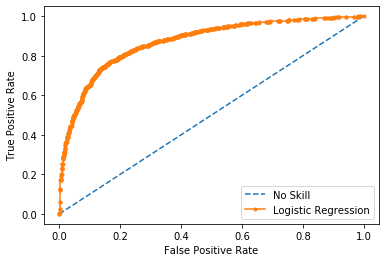

Eficiencia 0.8014  Int_Eficiencia 0.007927168473042567  Sensibilidad 0.8015619936035993  Int_Sensibilidad 0.016000221452669116  Precision 0.8016070728288835  Int_Precision 0.015420196086141404  F-Score 0.8013593163013373  Int_F-Score 0.00836087477938488  Error_Prueba 0.19860000000000003  Int_Error 0.007927168473042564  Tiempo ejecución 0.7596900463104248


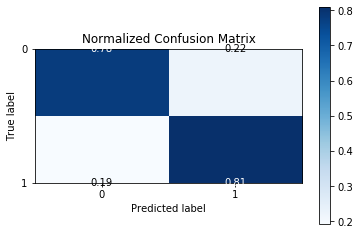

In [20]:
#Con 700 características

Acc, IntAcc, Sen, IntSen, Pre, IntPre, f, IntF, error, stdError, tiempo = LRC(1, 'liblinear', impresion = True)
print('Eficiencia',Acc, ' Int_Eficiencia', IntAcc,' Sensibilidad', Sen, ' Int_Sensibilidad',IntSen,' Precision', Pre, ' Int_Precision',IntPre,' F-Score', f, ' Int_F-Score',IntF,' Error_Prueba', error,' Int_Error', stdError,' Tiempo ejecución', tiempo)

No Skill: ROC AUC=0.500
Logistic Regression : ROC AUC=0.792


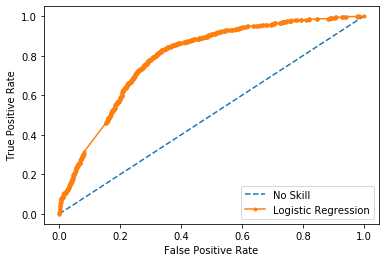

Eficiencia 0.743  Int_Eficiencia 0.0036386810797320646  Sensibilidad 0.7429800404447715  Int_Sensibilidad 0.08490128545401922  Precision 0.7501477567628217  Int_Precision 0.04271476247832041  F-Score 0.7410963832316919  Int_F-Score 0.022541865427227976  Error_Prueba 0.257  Int_Error 0.0036386810797320508  Tiempo ejecución 1.3612358570098877


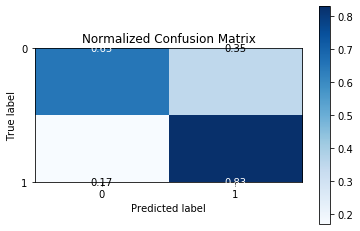

In [37]:
#Con 200 características

Acc, IntAcc, Sen, IntSen, Pre, IntPre, f, IntF, error, stdError, tiempo = LRC(1, 'liblinear', impresion = True)
print('Eficiencia',Acc, ' Int_Eficiencia', IntAcc,' Sensibilidad', Sen, ' Int_Sensibilidad',IntSen,' Precision', Pre, ' Int_Precision',IntPre,' F-Score', f, ' Int_F-Score',IntF,' Error_Prueba', error,' Int_Error', stdError,' Tiempo ejecución', tiempo)

No Skill: ROC AUC=0.500
Logistic Regression : ROC AUC=0.798


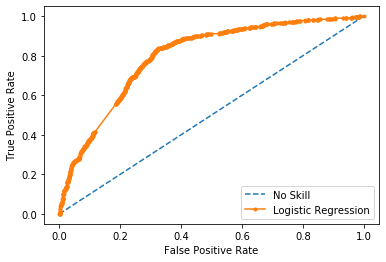

Eficiencia 0.7446  Int_Eficiencia 0.0048538644398046496  Sensibilidad 0.7437684525121556  Int_Sensibilidad 0.08507340848248299  Precision 0.7513066218063926  Int_Precision 0.039819205576442473  F-Score 0.742365280571001  Int_F-Score 0.024688417990911007  Error_Prueba 0.2554  Int_Error 0.004853864439804631  Tiempo ejecución 1.6084604263305664


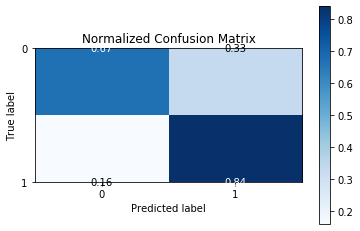

In [12]:
#Con 300 características

Acc, IntAcc, Sen, IntSen, Pre, IntPre, f, IntF, error, stdError, tiempo = LRC(1, 'liblinear', impresion = True)
print('Eficiencia',Acc, ' Int_Eficiencia', IntAcc,' Sensibilidad', Sen, ' Int_Sensibilidad',IntSen,' Precision', Pre, ' Int_Precision',IntPre,' F-Score', f, ' Int_F-Score',IntF,' Error_Prueba', error,' Int_Error', stdError,' Tiempo ejecución', tiempo)

In [22]:
X.shape

(10000, 700)

In [44]:
pd.options.mode.chained_assignment = None

randn = np.random.randn
df_types = pd.DataFrame({
    'Tipo de solver' : pd.Series(['newton-cg', 'newton-cg', 'newton-cg', 'newton-cg', 'newton-cg', 'newton-cg', 
                          'lbfgs', 'lbfgs', 'lbfgs', 'lbfgs', 'lbfgs', 'lbfgs', 
                          'liblinear', 'liblinear', 'liblinear','liblinear','liblinear','liblinear',
                          'sag','sag','sag','sag','sag','sag',
                          'saga','saga','saga','saga','saga','saga']),
    'Valor de regularización' : pd.Series([0.01,0.1,0.5,1,1.5,2,
                                           0.01,0.1,0.5,1,1.5,2,
                                           0.01,0.1,0.5,1,1.5,2,
                                           0.01,0.1,0.5,1,1.5,2,
                                           0.01,0.1,0.5,1,1.5,2])})
df_types["Eficiencia"] = ""
df_types["Int_Eficiencia"] = ""
df_types["Sensibilidad"] = ""
df_types["Int_Sensibilidad"] = ""
df_types["Precision"] = ""
df_types["Int_Precision"] = ""
df_types["F-Score"] = ""
df_types["Int_F-Score"] = ""
df_types["Error_Prueba"] = ""
df_types["Int_error"] = ""
df_types["Tiempo de ejecución"] = ""
df_types.set_index(['Tipo de solver', 'Valor de regularización'], inplace=True)

i = 0
for k, n in df_types.index:
    Acc, IntAcc, Sen, IntSen, Pre, IntPre, f, IntF, error, stdError, tiempo = LRC(n, k, impresion = False)
    df_types["Eficiencia"][i] = Acc
    df_types["Int_Eficiencia"][i] = IntAcc
    df_types["Sensibilidad"][i] = Sen
    df_types["Int_Sensibilidad"][i] = IntSen
    df_types["Precision"][i] = Pre
    df_types["Int_Precision"][i] = IntPre
    df_types["F-Score"][i] = f
    df_types["Int_F-Score"][i] = IntF
    df_types["Error_Prueba"][i] = error
    df_types["Int_error"][i] = stdError
    df_types["Tiempo de ejecución"][i] = tiempo
    
    i += 1
    
qgrid_widget = qgrid.show_grid(df_types, show_toolbar=False)
qgrid_widget

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [45]:
qgrid_widget.get_changed_df()

Eficiencia  \
Tipo de solver Valor de regularización                       
newton-cg      0.01                                 0.7656   
               0.10                                 0.7824   
               0.50                                 0.8015   
               1.00                                 0.8034   
               1.50                     0.8007000000000001   
               2.00                                 0.8021   
lbfgs          0.01                     0.7586999999999999   
               0.10                                 0.7879   
               0.50                                 0.7958   
               1.00                                 0.8042   
               1.50                                 0.7957   
               2.00                     0.7962999999999999   
liblinear      0.01                                 0.7617   
               0.10                     0.7909999999999999   
               0.50                                 0.8042   
               1.00                     0.7987000000000001   
               1.50                     0.8009000000000001   
               2.00                     0.8040999999999999   
sag            0.01                     0.7554000000000001   
               0.10                                 0.7886   
               0.50                                 0.7969   
               1.00                                 0.8085   
               1.50                     0.8009999999999999   
               2.00                     0.8009000000000001   
saga           0.01                                 0.7663   
               0.10                                 0.7919   
               0.50                                 0.7971   
               1.00                     0.7976000000000001   
               1.50                                 0.8021   
               2.00                                 0.7987   

                                               Int_Eficiencia  \
Tipo de solver Valor de regularización                          
newton-cg      0.01                      0.004445222154178571   
               0.10                      0.007042726744663578   
               0.50                      0.005631163290120444   
               1.00                      0.003944616584663169   
               1.50                      0.006009159675029471   
               2.00                      0.004457577817604542   
lbfgs          0.01                      0.007485318964479745   
               0.10                      0.008618004409374604   
               0.50                      0.006148170459575759   
               1.00                       0.00188679622641131   
               1.50                     0.0029983328701129876   
               2.00                       0.00602909611799316   
liblinear      0.01                      0.005847221562417473   
               0.10                      0.009097252332435326   
               0.50                       0.00599666574022599   
               1.00                       0.00442153819388684   
               1.50                      0.010116817681464848   
               2.00                      0.006808083430746167   
sag            0.01                     0.0042567593307585565   
               0.10                     0.0036276714294434043   
               0.50                      0.003011644069275124   
               1.00                     0.0059084684986889895   
               1.50                      0.004512205669071392   
               2.00                      0.003327160951922822   
saga           0.01                      0.006244197306299645   
               0.10                      0.004528796749689689   
               0.50                      0.004311612227461984   
               1.00                     0.0030594117081556714   
               1.50                      0.007213182376732181   
               2.00                      0.00401

# Random Forest

In [14]:
from sklearn.ensemble import RandomForestClassifier # Se llama a la librería del método Random Forest

In [19]:
def model_RF(estimadores, caracteristicas, impresion = False):
        
    tiempo_i = time.time()
    
    accuracy_list = np.zeros([4])
    precision_list = np.zeros([4,2])
    recall_list = np.zeros([4,2])
    f_list = np.zeros([4,2]) 
    errores = np.zeros(4)
    
    RF = RandomForestClassifier(n_estimators=estimadores, max_features =caracteristicas, n_jobs = -1)
    
    for j in range(4):
        Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.25) # Modificar metodología de validación
        scaler = MinMaxScaler()#Escala entre 0 y 1
        Xtrain = scaler.fit_transform(Xtrain)
        Xtest = scaler.transform(Xtest)
        
        RF.fit(Xtrain, Ytrain)
        pred = RF.predict(Xtest)
        
        #code for calculating accuracy 
        _accuracy_ = accuracy_score(Ytest, pred, normalize=True)
        accuracy_list[j] = _accuracy_

        #code for calculating recall 
        _recalls_ = recall_score(Ytest, pred, average=None)
        recall_list[j] = _recalls_

        #code for calculating precision 
        _precisions_ = precision_score(Ytest, pred, average=None)
        precision_list[j] = _precisions_
        
        _f_score_ = f1_score(Ytest, pred, average=None)
        f_list[j] = _f_score_

        
        errores[j] = classification_error(pred, Ytest)
       
    
    if impresion == True:
        #Curva ROC
        
        rf_probs = RF.predict_proba(Xtest)
        
        plot_roc(Xtest, Ytest, rf_probs, "Logistic Regression")
        
#         auc = roc_auc_score(Ytest, pred)
#         print('AUC: %.2f' % auc)
#         fpr, tpr, thresholds = roc_curve(Ytest, pred)
#         plot_roc_curve(fpr, tpr)
        #Matriz de confusión
        skplt.metrics.plot_confusion_matrix(Ytest, pred, normalize=True)

    return str(np.mean(accuracy_list)), str(np.std(accuracy_list)), str(np.mean(recall_list)), str(np.std(recall_list)), str(np.mean(precision_list)), str(np.std(precision_list)),  str(np.mean(f_list)), str(np.std(f_list)), str(np.mean(errores)), str(np.std(errores)), str(time.time()-tiempo_i)
    

AUC: 0.81


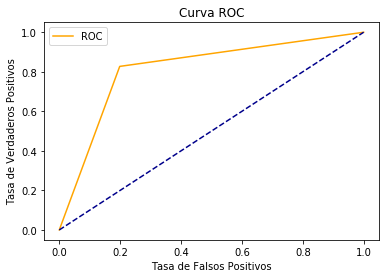

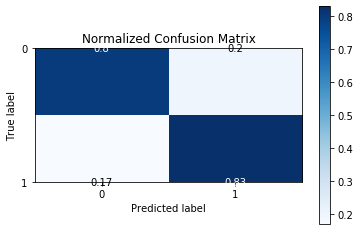

In [48]:
Acc, IntAcc, Sen, IntSen, Pre, IntPre, f, IntF, error, stdError, tiempo = model_RF(100, 50, impresion = True)

In [49]:
print('Eficiencia',Acc, ' Int_Eficiencia', IntAcc,' Sensibilidad', Sen, ' Int_Sensibilidad',IntSen,' Precision', Pre, ' Int_Precision',IntPre,' F-Score', f, ' Int_F-Score',IntF,' Error_Prueba', error,' Int_Error', stdError,' Tiempo ejecución', tiempo)

Eficiencia 0.8056  Int_Eficiencia 0.008740709353364864  Sensibilidad 0.8057266305162827  Int_Sensibilidad 0.030967804698351812  Precision 0.8066910559188663  Int_Precision 0.021454737628030088  F-Score 0.8054432736298711  Int_F-Score 0.010322100517828305  Error_Prueba 0.1944  Int_Error 0.008740709353364871  Tiempo ejecución 106.69102621078491


No Skill: ROC AUC=0.500
Logistic Regression : ROC AUC=0.803


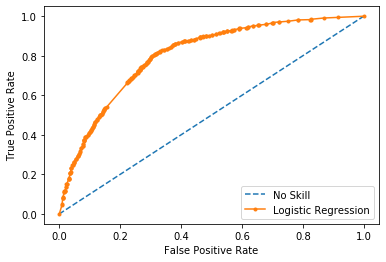

Eficiencia 0.7258  Int_Eficiencia 0.007213875518748564  Sensibilidad 0.7258710263924962  Int_Sensibilidad 0.025997282308308636  Precision 0.7263247173948466  Int_Precision 0.016233706460330826  F-Score 0.7255975922724065  Int_F-Score 0.01046148513303363  Error_Prueba 0.2742  Int_Error 0.007213875518748564  Tiempo ejecución 11.003992319107056


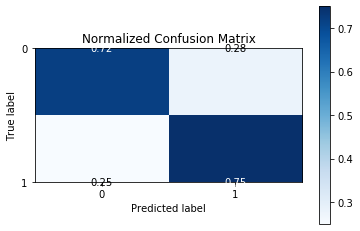

In [20]:
Acc, IntAcc, Sen, IntSen, Pre, IntPre, f, IntF, error, stdError, tiempo = model_RF(100, 50, impresion = True)
print('Eficiencia',Acc, ' Int_Eficiencia', IntAcc,' Sensibilidad', Sen, ' Int_Sensibilidad',IntSen,' Precision', Pre, ' Int_Precision',IntPre,' F-Score', f, ' Int_F-Score',IntF,' Error_Prueba', error,' Int_Error', stdError,' Tiempo ejecución', tiempo)

In [50]:
pd.options.mode.chained_assignment = None

randn = np.random.randn
df_types = pd.DataFrame({
    'Numero de arboles' : pd.Series([5,5,5,5,5,5,
                                     10,10,10,10,10,10,
                                     20,20,20,20,20,20,
                                     50,50,50,50,50,50,
                                     100,100,100,100,100,100]), 
    'Variables analizadas por nodo' : pd.Series([50,100,250,500,750,1000,
                                                 50,100,250,500,750,1000,
                                                 50,100,250,500,750,1000,
                                                 50,100,250,500,750,1000,
                                                 50,100,250,500,750,1000,])})
df_types["Eficiencia"] = ""
df_types["Int_Eficiencia"] = ""
df_types["Sensibilidad"] = ""
df_types["Int_Sensibilidad"] = ""
df_types["Precision"] = ""
df_types["Int_Precision"] = ""
df_types["F-Score"] = ""
df_types["Int_F-Score"] = ""
df_types["Error_Prueba"] = ""
df_types["Int_error"] = ""
df_types["Tiempo de ejecución"] = ""
df_types.set_index(['Numero de arboles','Variables analizadas por nodo'], inplace=True)

for n, k in df_types.index:
    Acc, IntAcc, Sen, IntSen, Pre, IntPre, f, IntF, error, stdError, tiempo = model_RF(n, k, impresion = False)
    df_types["Eficiencia"][n,k] = Acc
    df_types["Int_Eficiencia"][n,k] = IntAcc
    df_types["Sensibilidad"][n,k] = Sen
    df_types["Int_Sensibilidad"][n,k] = IntSen
    df_types["Precision"][n,k] = Pre
    df_types["Int_Precision"][n,k] = IntPre
    df_types["F-Score"][n,k] = f
    df_types["Int_F-Score"][n,k] = IntF
    df_types["Error_Prueba"][n,k] = error
    df_types["Int_error"][n,k] = stdError
    df_types["Tiempo de ejecución"][n,k] = tiempo


#df_types.sort_index(inplace=True)
qgrid_widget = qgrid.show_grid(df_types, show_toolbar=False)
qgrid_widget

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [51]:
qgrid_widget.get_changed_df()

Eficiencia  \
Numero de arboles Variables analizadas por nodo                       
5                 50                             0.7434000000000001   
                  100                            0.7554000000000001   
                  250                            0.7567999999999999   
                  500                                        0.7593   
                  750                            0.7573000000000001   
                  1000                                        0.755   
10                50                             0.7707999999999999   
                  100                                        0.7685   
                  250                            0.7736999999999999   
                  500                            0.7670000000000001   
                  750                            0.7707999999999999   
                  1000                           0.7835000000000001   
20                50                                         0.7923   
                  100                                        0.7924   
                  250                                        0.7843   
                  500                            0.7918000000000001   
                  750                                        0.7942   
                  1000                                       0.7855   
50                50                                         0.8012   
                  100                                        0.7986   
                  250                                        0.7933   
                  500                                        0.8059   
                  750                            0.7958000000000001   
                  1000                                       0.7911   
100               50                                         0.8063   
                  100                                         0.802   
                  250                                        0.7959   
                  500                            0.7971999999999999   
                  750                                        0.7909   
                  1000                           0.7966000000000001   

                                                        Int_Eficiencia  \
Numero de arboles Variables analizadas por nodo                          
5                 50                               0.00812157620169879   
                  100                            0.0012806248474865718   
                  250                             0.008795453370918405   
                  500                             0.002027313493271341   
                  750                             0.010148398888494694   
                  1000                            0.005095095681142786   
10                50                              0.004498888751680787   
                  100                             0.005187484939737166   
                  250                             0.006276145313805282   
                  500                             0.010622617379911603   
                  750                            0.0022090722034374503   
                  1000                            0.008613361713059516   
20                50                              0.009651424765287282   
                  100                             0.007282856582413241   
                  250                            0.0048363209157374805   
                  500                            0.0062769419305900905   
                  750                             0.004669047011971532   
                  1000                           0.0077272245987806045   
50                50                                0.0057131427428343   
                  100                             0.005347896782848354   
                  250                             0.006048966853934621   
                  500                             0.007830070242341365   
        